# 1. Data Processing

The first part of our analysis is to read in the bodyfat data and do some data cleaning and manipulation. We basically use some numerical methods and graphical methods.

## 1.1. Read Data

>First of all, we read in "BodyFat.csv" as our raw dataset. Two columns, IDNO and DENSITY, are removed since we won't consider these two variables as explanatory variables in our model. 

In [1]:
rm(list =ls())
library(MASS)
library(ggplot2)
data = read.csv("BodyFat.csv")
data = data[c(-1,-3)] # Remove indexes and density
head(data) # check the first six lines of the data

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


BODYFAT,AGE,WEIGHT,HEIGHT,ADIPOSITY,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
12.6,23,154.25,67.75,23.7,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
6.9,22,173.25,72.25,23.4,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
24.6,22,154.00,66.25,24.7,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
10.9,26,184.75,72.25,24.9,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
27.8,24,184.25,71.25,25.6,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7
20.6,24,210.25,74.75,26.5,39.0,104.5,94.4,107.8,66.0,42.0,25.6,35.7,30.6,18.8


>Next, we use the summary function to get the quantiles of the variables. Also, we draw scatter plots to see the distribution. They are shown as follows:

In [2]:
dim(data)

[1] 252  15

In [3]:
colnames(data)

[1] "BODYFAT"   "AGE"       "WEIGHT"    "HEIGHT"    "ADIPOSITY" "NECK"     
 [7] "CHEST"     "ABDOMEN"   "HIP"       "THIGH"     "KNEE"      "ANKLE"    
[13] "BICEPS"    "FOREARM"   "WRIST"

In [4]:
summary(data)

    BODYFAT           AGE            WEIGHT          HEIGHT     
 Min.   : 0.00   Min.   :22.00   Min.   :118.5   Min.   :29.50  
 1st Qu.:12.80   1st Qu.:35.75   1st Qu.:159.0   1st Qu.:68.25  
 Median :19.00   Median :43.00   Median :176.5   Median :70.00  
 Mean   :18.94   Mean   :44.88   Mean   :178.9   Mean   :70.15  
 3rd Qu.:24.60   3rd Qu.:54.00   3rd Qu.:197.0   3rd Qu.:72.25  
 Max.   :45.10   Max.   :81.00   Max.   :363.1   Max.   :77.75  
   ADIPOSITY          NECK           CHEST           ABDOMEN      
 Min.   :18.10   Min.   :31.10   Min.   : 79.30   Min.   : 69.40  
 1st Qu.:23.10   1st Qu.:36.40   1st Qu.: 94.35   1st Qu.: 84.58  
 Median :25.05   Median :38.00   Median : 99.65   Median : 90.95  
 Mean   :25.44   Mean   :37.99   Mean   :100.82   Mean   : 92.56  
 3rd Qu.:27.32   3rd Qu.:39.42   3rd Qu.:105.38   3rd Qu.: 99.33  
 Max.   :48.90   Max.   :51.20   Max.   :136.20   Max.   :148.10  
      HIP            THIGH            KNEE           ANKLE          BICEPS  

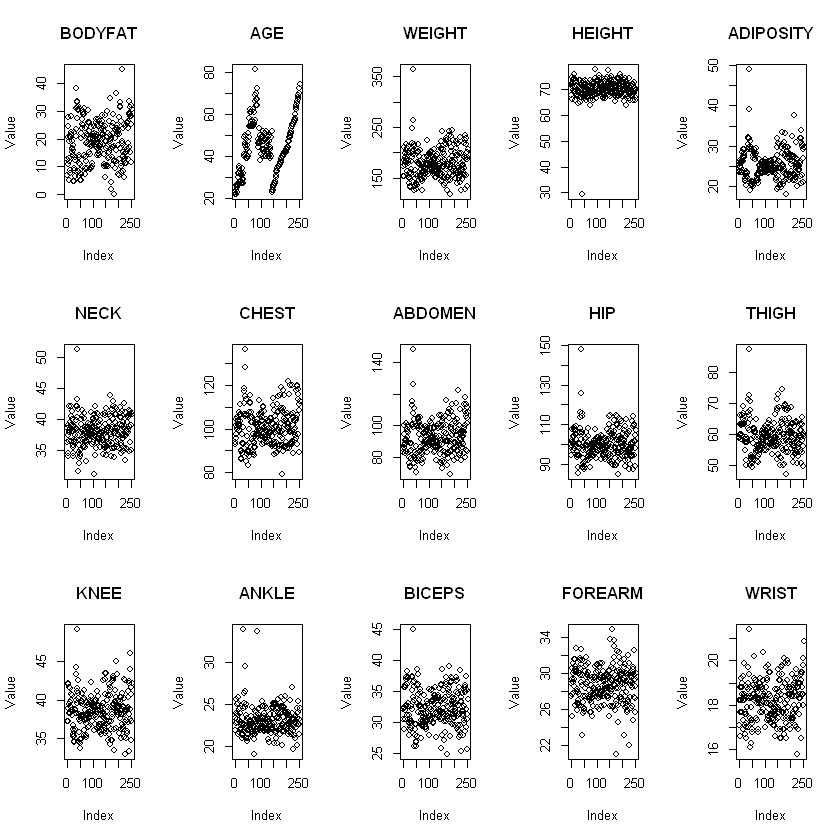

In [5]:
par(mfrow = c(3,5))
for(i in 1:15){
    plot(data[,i], main = colnames(data)[i], ylab = "Value")
}
par(mfrow = c(1,1))

> It seems that there are some extremely small/large values and abnormal values, so we mark these observations as potential outliers. We also check them to see whether we can do some remedies.

In [6]:
RMIndex = which(data[,1]==0 | data[,1]==max(data[,1]) | data[,3]==max(data[,3]) | data[,4]==min(data[,4]) | data[,6]==max(data[,6]) | data[,7]>125 | 
                data[,8]==max(data[,8]) | data[,9]>120 | data[,10]==max(data[,10]) | data[,11]==max(data[,11]) | 
                data[,11]==max(data[,11]) | data[,12]>29 | data[,13]==max(data[,13]))

In [7]:
data[RMIndex,]

,BODYFAT,AGE,WEIGHT,HEIGHT,ADIPOSITY,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
31,12.3,32,182.00,73.75,23.6,38.7,100.5,88.7,99.8,57.5,38.7,33.9,32.5,27.7,18.4
39,33.8,46,363.15,72.25,48.9,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4
41,33.1,45,262.75,68.75,39.1,43.2,128.3,126.2,125.6,72.5,39.6,26.6,36.4,32.7,21.4
42,31.7,44,205.00,29.50,29.9,36.6,106.0,104.3,115.5,70.6,42.5,23.7,33.6,28.7,17.4
86,25.8,67,167.00,67.50,26.0,36.5,98.9,89.7,96.2,54.7,37.8,33.7,32.4,27.7,18.2
182,0.0,40,118.50,68.00,18.1,33.8,79.3,69.4,85.0,47.2,33.5,20.2,27.7,24.6,16.5
216,45.1,51,219.00,64.00,37.6,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,29.1,18.4


>The 42th observation has a really small height value. After referring to his weight and BMI, we find that this should be a mis-measurement and we correct this by using the formula $BMI=\frac{weight}{height^2}$ ($kg/m^2$). 

In [8]:
data[42, ]

,BODYFAT,AGE,WEIGHT,HEIGHT,ADIPOSITY,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
42,31.7,44,205,29.5,29.9,36.6,106,104.3,115.5,70.6,42.5,23.7,33.6,28.7,17.4


In [9]:
# 1kg = 0.4535922921969lbs
# test 
weight1 <- 154.25 * 0.4535922921969
height1 <- 67.75 * 0.0254
bmi <- weight1 / height1^2

weight42 <- 205 * 0.4535922921969
height42 <- sqrt(weight42 / 29.9) 
data[42, 4] <- height42 / 0.0254 
data[42, 4]

[1] 69.42893

> For all other potential outliers, they all have their own problems and there's no desirable way to fix them. We simply drop them from the dataset.

In [10]:
data[163,5]=27.4
data[221,5]=21.7

In [11]:
RMIndex <- c(31, 39, 41, 86, 182, 216) 

## 1.2. Simple Linear Regression

> After deleting outliers, we fit a simple linear model using all the variables we have. This is considered as our full model and we draw the residuals plot and normal Q-Q plot to check whether model assumptions are valid.

In [12]:
lm.naive = lm(BODYFAT~., data = data[-RMIndex,])
summary(lm.naive)


Call:
lm(formula = BODYFAT ~ ., data = data[-RMIndex, ])

Residuals:
    Min      1Q  Median      3Q     Max 
-9.4304 -2.7957 -0.0862  2.6487  9.0257 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -69.91138   55.01748  -1.271  0.20511    
AGE           0.06260    0.03016   2.076  0.03904 *  
WEIGHT       -0.21524    0.15387  -1.399  0.16319    
HEIGHT        0.89059    0.78144   1.140  0.25560    
ADIPOSITY     1.61426    1.11284   1.451  0.14825    
NECK         -0.37497    0.21916  -1.711  0.08843 .  
CHEST        -0.13901    0.10263  -1.354  0.17691    
ABDOMEN       0.80743    0.08537   9.458  < 2e-16 ***
HIP          -0.17923    0.14027  -1.278  0.20263    
THIGH         0.19078    0.13840   1.378  0.16939    
KNEE         -0.02814    0.24872  -0.113  0.91002    
ANKLE        -0.05908    0.33596  -0.176  0.86056    
BICEPS        0.12077    0.16050   0.752  0.45252    
FOREARM       0.23895    0.19305   1.238  0.21706    
WRIST        -1.49557  

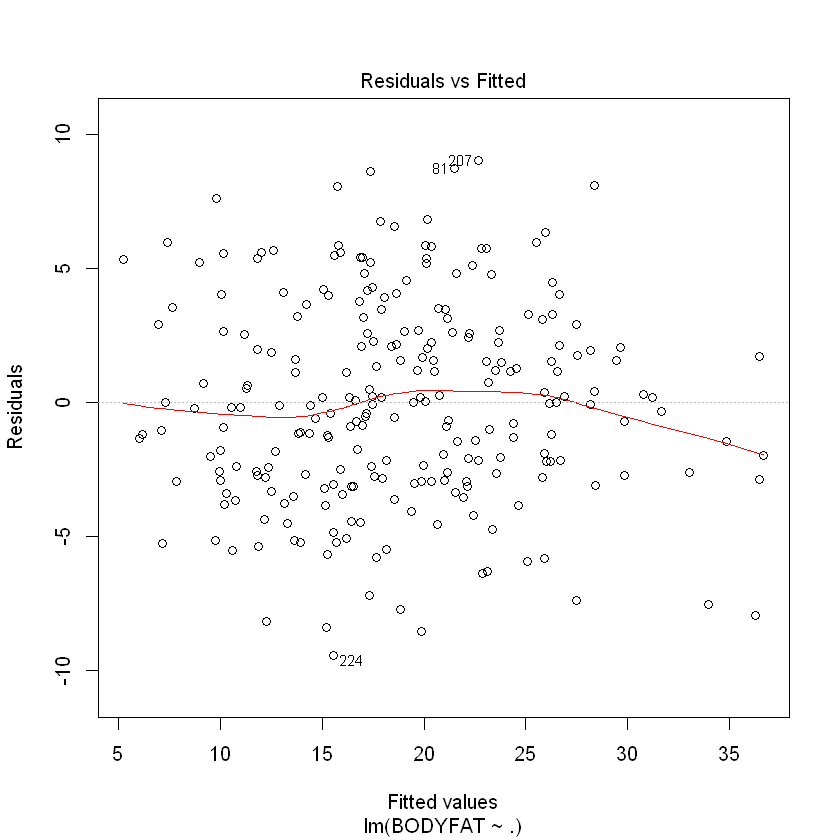

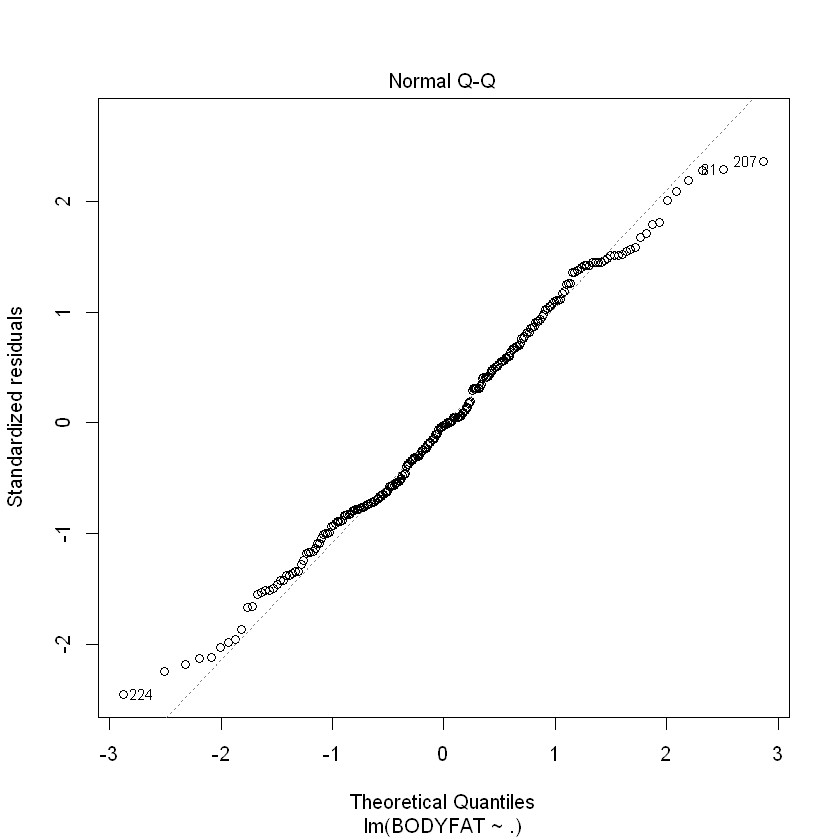

In [13]:
plot(lm.naive,which=c(1,2))

## 1.3. Identify Strong Influential Points

> Since we merely filtered out the outliers before by looking at the data, we need to use the full model to identify whether there are missing outliers or influential points. The diagnostic methods include studentized residuals, leverage value, dffits, and cook's distance.

### 1.3.1. Studentized Residual

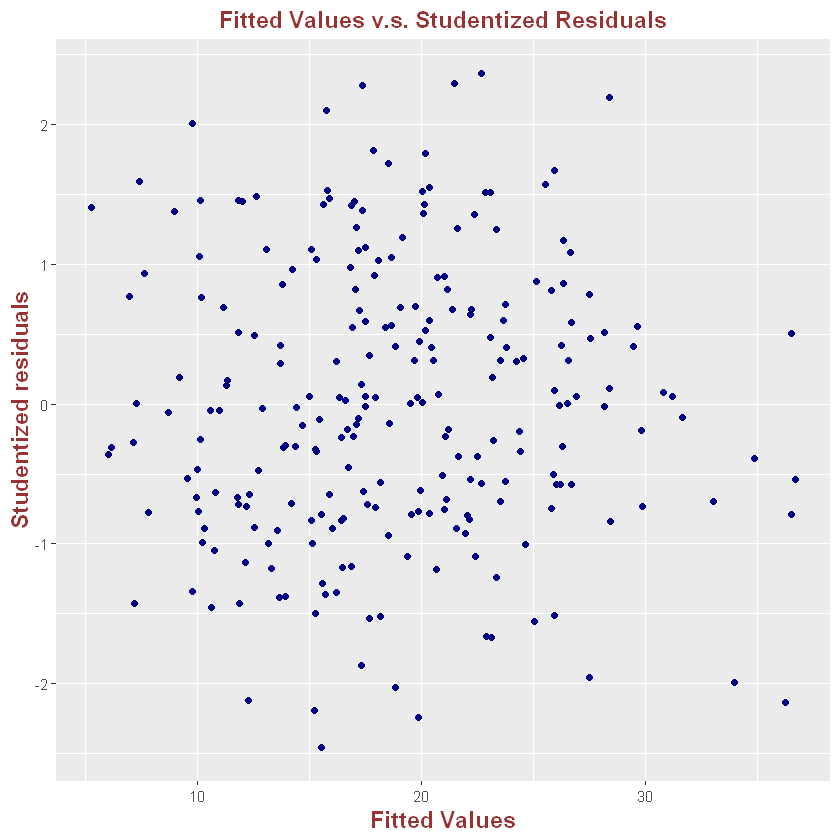

In [15]:
lm.stdres = stdres(lm.naive)
df = data.frame(fit = lm.naive$fitted.values, str = lm.stdres)
ggplot(df,aes(x = fit, y = str)) + geom_point(shape = 19, color = 'navyblue') + ggtitle("Fitted Values v.s. Studentized Residuals") +
                                   xlab("Fitted Values") + ylab("Studentized residuals") + 
                                   theme( plot.title = element_text(color="#993333", size=14, face="bold",hjust = 0.5),
                                          axis.title.x = element_text(color="#993333", size=14, face="bold"),
                                         axis.title.y = element_text(color="#993333", size=14, face="bold"),
                                         )

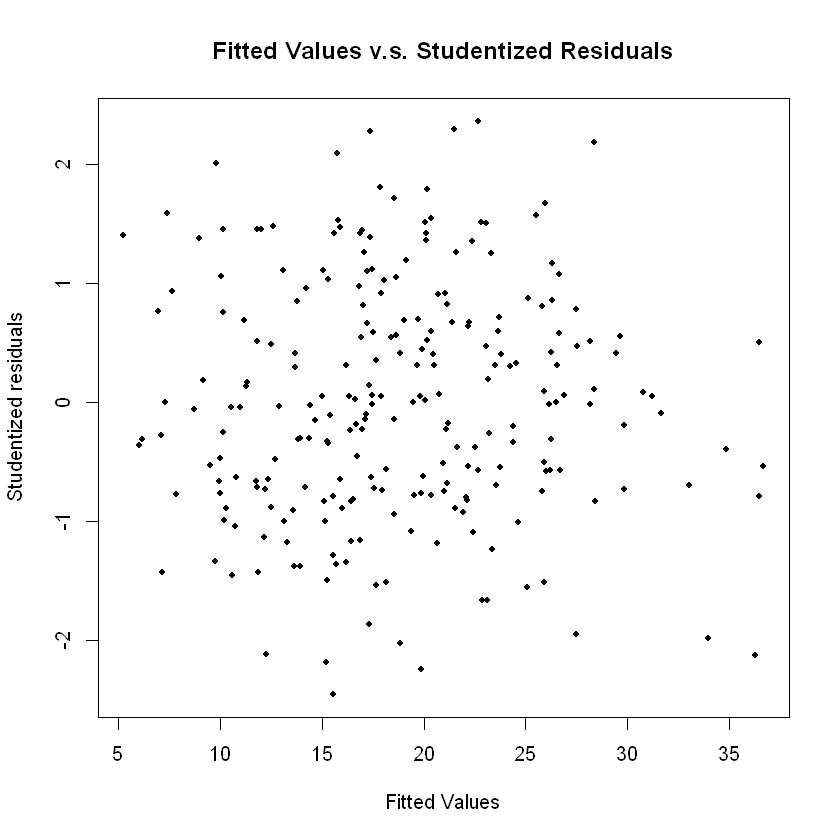

In [16]:
index = 1:dim(data)[1]
lm.stdres = stdres(lm.naive)
plot(x = lm.naive$fitted.values, y = lm.stdres, ylab = "Studentized residuals", xlab = "Fitted Values", 
     main = "Fitted Values v.s. Studentized Residuals", pch = 20)
#text(y = lm.stdres[which(abs(lm.stdres)>3)], x = lm.naive$fitted.values[which(abs(lm.stdres)>3)], 
#     labels = index[which(abs(lm.stdres)>3)], cex = 1, pos = 3)

### 1.3.2. Leverage Value

#### Set index manully

In [17]:
index = 1:252
index = index[-RMIndex]

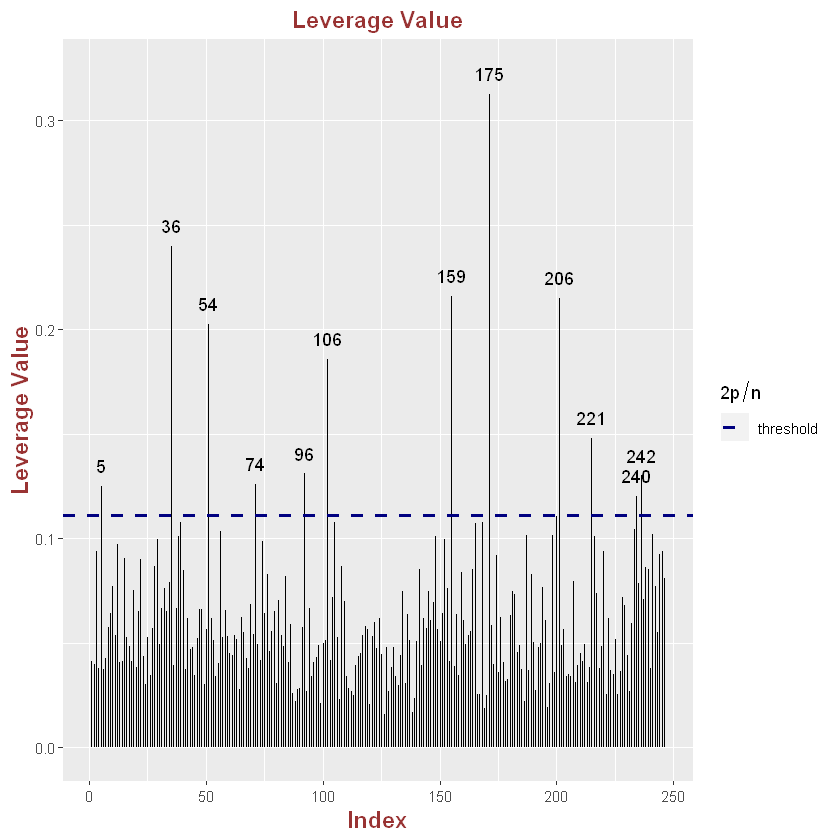

In [18]:
lm.hats=hatvalues(lm.naive)
df = data.frame(x = 1:length(index), y = lm.hats)
h0 = 28/252 # Rule of thumb for judging outliers
ggplot(df,aes(x=x,xend=x,y=0,yend=y,label = index)) + geom_segment() + 
       annotate("text", x=which(lm.hats>h0), y=lm.hats[lm.hats>h0] + 0.01,  label= index[which(lm.hats>h0)]) +
       geom_hline(aes(yintercept=h0, linetype= "threshold"), 
                color = "navyblue", size=1) + 
       ggtitle("Leverage Value") + xlab("Index") + ylab("Leverage Value") + 
                                   theme( plot.title = element_text(color="#993333", size=14, face="bold",hjust = 0.5),
                                          axis.title.x = element_text(color="#993333", size=14, face="bold"),
                                         axis.title.y = element_text(color="#993333", size=14, face="bold"),
                                         )  + 
       scale_linetype_manual(name = expression(2*p/n), values = 2, 
                      guide = guide_legend(override.aes = list(color = c("navyblue"))))
#ggplot(df,aes(x=x,y=y,label = index)) + geom_point() + geom_text(hjust=0, vjust=0)


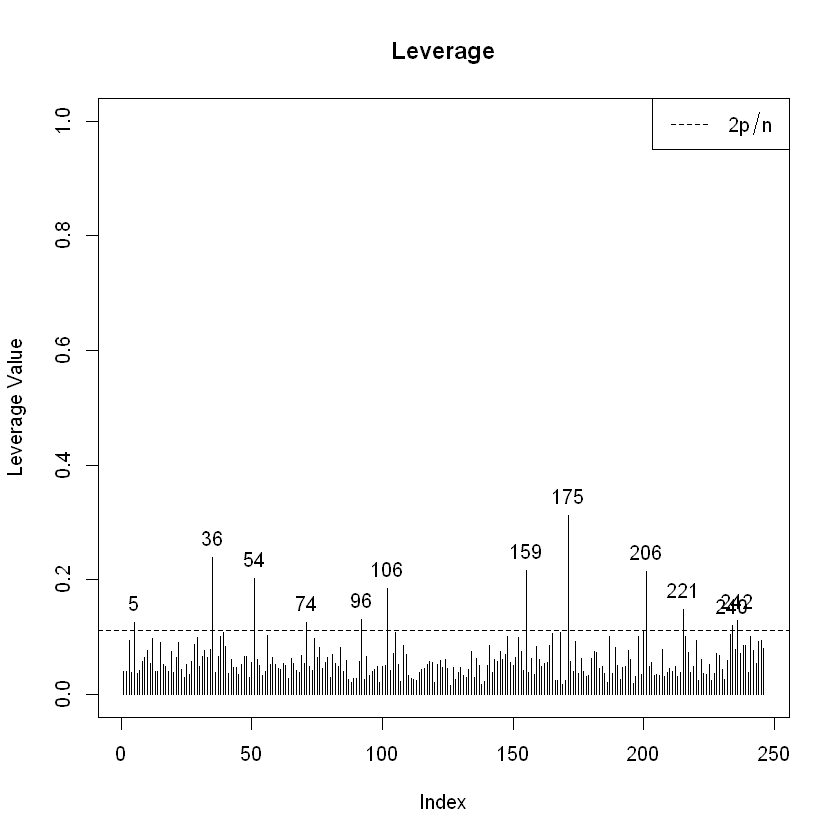

In [19]:
lm.hats=hatvalues(lm.naive)
plot(lm.hats, type = "h", ylim = c(0, 1), ylab = "Leverage Value", main = "Leverage") 
h0 = 28/252 # Rule of thumb for judging outliers
text(y = lm.hats[lm.hats>h0], x = which(lm.hats>h0), labels = index[which(lm.hats>h0)], cex = 1, pos = 3)
abline(h = h0, lty = 2)
legend("topright", legend = expression(2*p/n), lty = 2)

### 1.3.3. DFFITS

In [20]:
#lm.dffits = dffits(lm.naive)
#dffit_index = as.numeric(names(lm.dffits))
#dffit_index

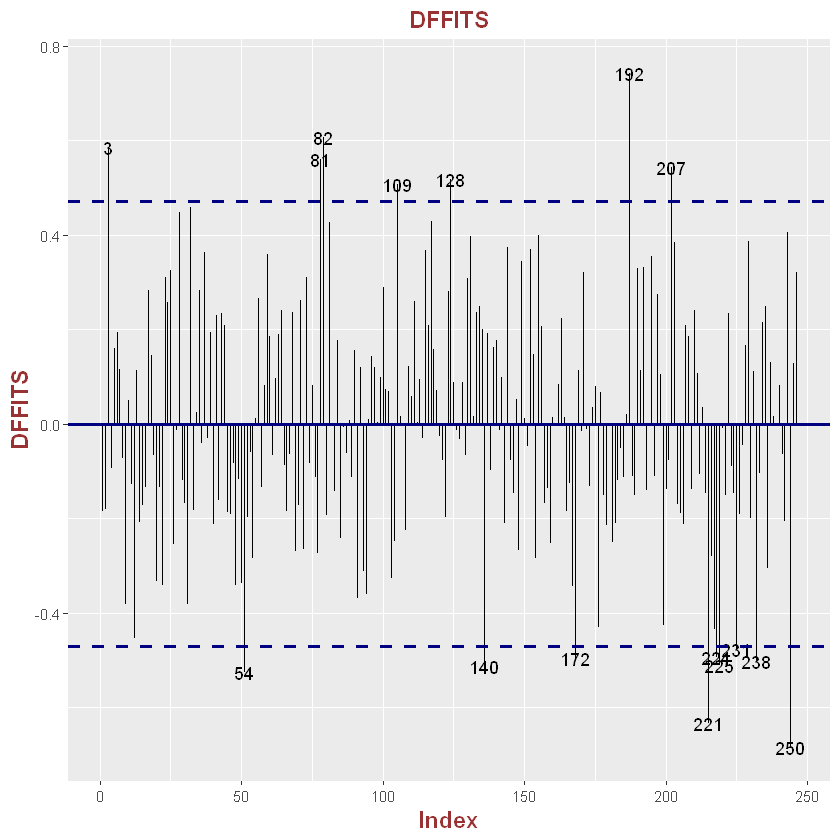

In [21]:
lm.dffits = dffits(lm.naive)
df = data.frame(x = 1:length(index), y = lm.dffits)
d0 = 2*sqrt(14/252) # Rule of thumb for judging influential points
ggplot(df,aes(x=x,xend=x,y=0,yend=y,label = index)) + geom_segment() + 
       annotate("text", x = which(abs(lm.dffits)>d0), y=lm.dffits[abs(lm.dffits)>d0],  label= index[which(abs(lm.dffits)>d0)]) +
       geom_hline(yintercept=c(-1*d0, 0, d0), linetype=c("dashed","solid","dashed"), 
                color = "navyblue", size=1) + 
       ggtitle("DFFITS") +         xlab("Index") + ylab("DFFITS") + 
                                   theme( plot.title = element_text(color="#993333", size=14, face="bold",hjust = 0.5),
                                          axis.title.x = element_text(color="#993333", size=14, face="bold"),
                                         axis.title.y = element_text(color="#993333", size=14, face="bold"),
                                         ) + 
       scale_linetype_manual(name = expression(2*sqrt(p/n)), values = c(2,1,2), 
                      guide = guide_legend(override.aes = list(color = c("navyblue","navyblue","navyblue"))))
       
#ggplot(df,aes(x=x,y=y,label = index)) + geom_point() + geom_text(hjust=0, vjust=0)


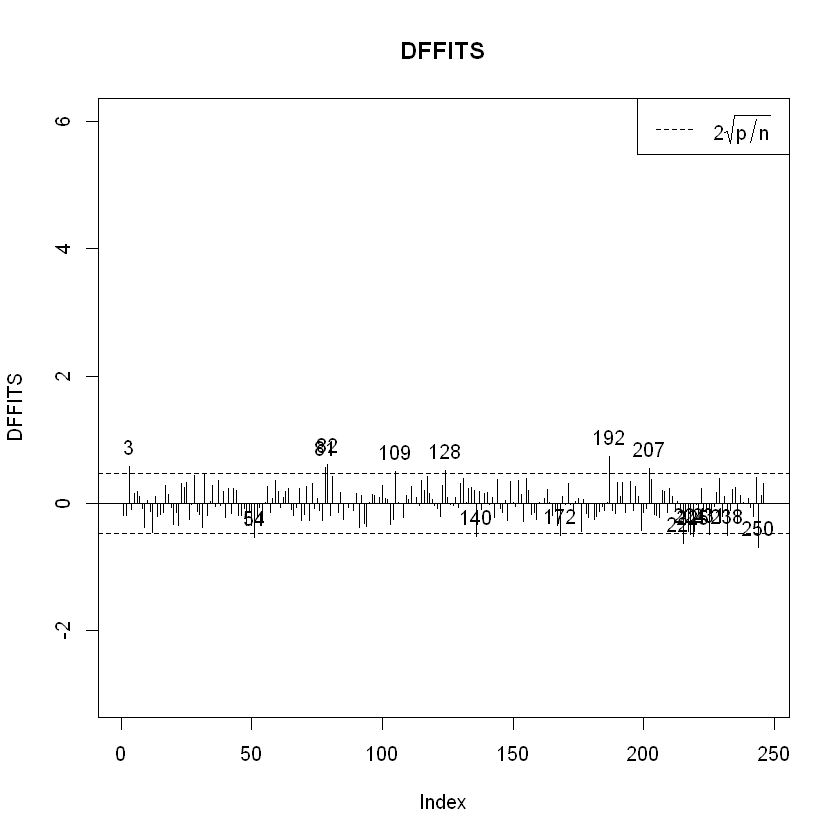

In [22]:
lm.dffits = dffits(lm.naive)
plot(lm.dffits, type = "h", ylim = c(-3, 6), ylab = "DFFITS", main = "DFFITS")
d0 = 2*sqrt(14/252) # Rule of thumb for judging influential points
text(y = lm.dffits[abs(lm.dffits)>d0], x = which(abs(lm.dffits)>d0), labels = index[which(abs(lm.dffits)>d0)], cex = 1, pos = 3)
abline(h = c(-1*d0, 0, d0), lty = c(2,1,2))
legend("topright", legend = expression(2*sqrt(p/n)), lty = 2)

### 1.3.4. Cook's Distance

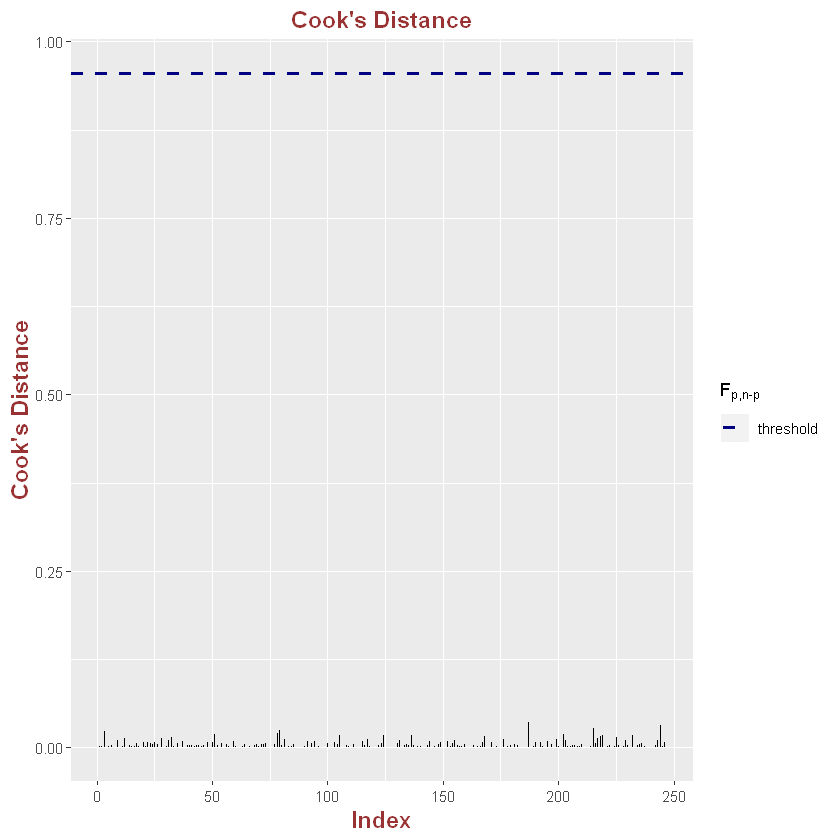

In [23]:
lm.cooksD=cooks.distance(lm.naive)
df = data.frame(x = 1:length(index), y = lm.cooksD)
c0 = qf(0.5, 14, 238)
ggplot(df,aes(x=x,xend=x,y=0,yend=y,label = index)) + geom_segment() + 
       #annotate("text", x=which(lm.hats>h0), y=lm.hats[lm.hats>h0] + 0.01,  label= index[which(lm.hats>h0)]) +
       geom_hline(aes(yintercept=c0, linetype= "threshold"), 
                color = "navyblue", size=1) + 
       ggtitle("Cook's Distance") + xlab("Index") + ylab("Cook's Distance") + 
                                   theme( plot.title = element_text(color="#993333", size=14, face="bold",hjust = 0.5),
                                          axis.title.x = element_text(color="#993333", size=14, face="bold"),
                                         axis.title.y = element_text(color="#993333", size=14, face="bold"),
                                         )  + 
       scale_linetype_manual(name = expression(F[paste("p,n-p", sep="")]), values = 2, 
                      guide = guide_legend(override.aes = list(color = c("navyblue"))))
#ggplot(df,aes(x=x,y=y,label = index)) + geom_point() + geom_text(hjust=0, vjust=0)


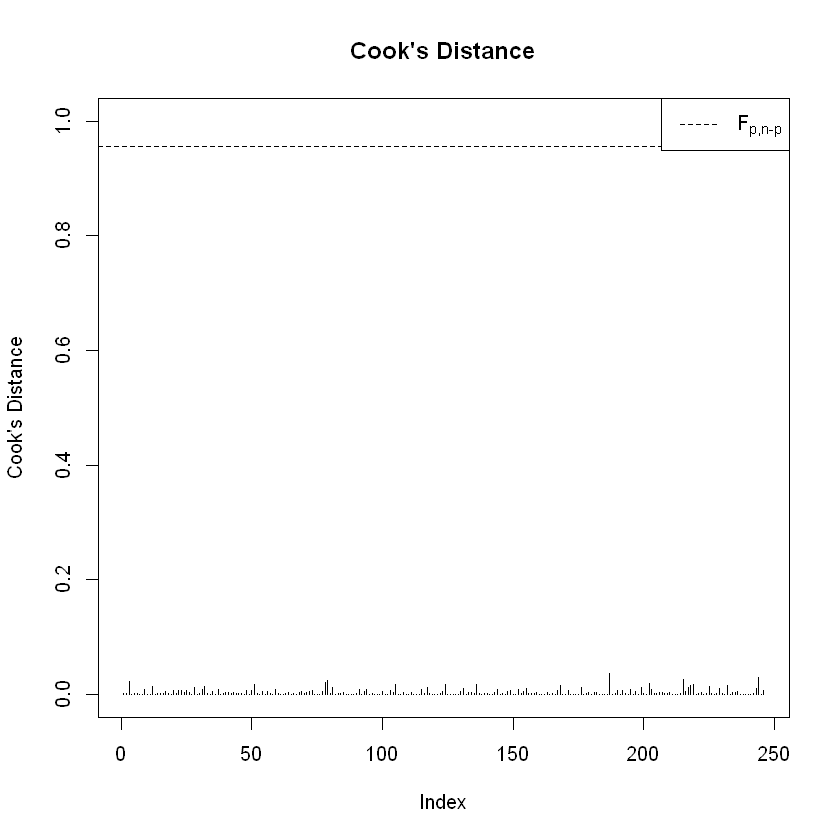

In [24]:
lm.cooksD=cooks.distance(lm.naive)
plot(lm.cooksD, type = "h", ylim = c(0, 1), ylab = "Cook's Distance", main = "Cook's Distance")
c0 = qf(0.5, 14, 238)
#text(y = lm.cooksD[lm.cooksD>c0], x = which(lm.cooksD>c0), labels = index[which(lm.cooksD>c0)], cex = 1, pos = 3)
abline(h = c0, lty = 2)
legend("topright", legend = expression(F[paste("p,n-p", sep="")]), lty = 2)

> The 221th observation seems to be an influential point with large leverage value and DFFITS. However, we think its data values are reasonable and we should not delete this observation.

In [25]:
data[index[which(lm.hats>h0 & abs(lm.dffits)>d0)],]

,BODYFAT,AGE,WEIGHT,HEIGHT,ADIPOSITY,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
54,7.1,49,152.75,73.5,19.9,35.1,93.3,79.6,91.6,52.6,37.6,22.6,38.5,27.4,18.5
221,12.7,54,153.25,70.5,21.7,38.5,99.0,91.8,96.2,57.7,38.1,23.9,31.4,29.9,18.9


# 2. Model Selection

## 2.1 Forward AIC Selection

In [26]:
biggest = formula(lm(BODYFAT~., data[-RMIndex,]))
biggest

BODYFAT ~ AGE + WEIGHT + HEIGHT + ADIPOSITY + NECK + CHEST + 
    ABDOMEN + HIP + THIGH + KNEE + ANKLE + BICEPS + FOREARM + 
    WRIST

In [27]:
step(lm(BODYFAT~1, data = data[-RMIndex,]), direction = "both", scope = biggest)

Start:  AIC=987.58
BODYFAT ~ 1

            Df Sum of Sq     RSS    AIC
+ ABDOMEN    1    8991.7  4526.3 720.43
+ ADIPOSITY  1    7141.0  6376.9 804.76
+ CHEST      1    6291.1  7226.8 835.54
+ HIP        1    5210.0  8307.9 869.83
+ WEIGHT     1    4943.9  8574.1 877.59
+ THIGH      1    4046.0  9472.0 902.09
+ KNEE       1    3554.9  9963.0 914.52
+ BICEPS     1    2995.3 10522.7 927.96
+ NECK       1    2898.7 10619.2 930.21
+ FOREARM    1    1649.9 11868.1 957.56
+ WRIST      1    1292.3 12225.6 964.87
+ AGE        1    1106.1 12411.9 968.59
+ ANKLE      1    1024.3 12493.6 970.20
<none>                   13518.0 987.58
+ HEIGHT     1       0.6 13517.3 989.57

Step:  AIC=720.43
BODYFAT ~ ABDOMEN

            Df Sum of Sq     RSS    AIC
+ WEIGHT     1     581.8  3944.5 688.58
+ WRIST      1     528.6  3997.7 691.88
+ HEIGHT     1     464.5  4061.8 695.80
+ NECK       1     372.3  4154.0 701.32
+ ANKLE      1     314.6  4211.6 704.71
+ KNEE       1     248.5  4277.8 708.54
+ HIP     


Call:
lm(formula = BODYFAT ~ ABDOMEN + WEIGHT + WRIST + BICEPS, data = data[-RMIndex, 
    ])

Coefficients:
(Intercept)      ABDOMEN       WEIGHT        WRIST       BICEPS  
   -27.4582       0.8844      -0.1034      -1.3528       0.2405  


In [28]:
summary(lm(BODYFAT~ABDOMEN+WEIGHT+WRIST, data[-RMIndex,]))
summary(lm(BODYFAT~ABDOMEN+WEIGHT+WRIST+BICEPS, data[-RMIndex,]))


Call:
lm(formula = BODYFAT ~ ABDOMEN + WEIGHT + WRIST, data = data[-RMIndex, 
    ])

Residuals:
   Min     1Q Median     3Q    Max 
-8.923 -2.910 -0.401  2.994  9.270 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -24.25349    6.27568  -3.865 0.000143 ***
ABDOMEN       0.87755    0.05216  16.823  < 2e-16 ***
WEIGHT       -0.08215    0.02228  -3.687 0.000280 ***
WRIST        -1.27640    0.39988  -3.192 0.001600 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.955 on 242 degrees of freedom
Multiple R-squared:   0.72,	Adjusted R-squared:  0.7165 
F-statistic: 207.4 on 3 and 242 DF,  p-value: < 2.2e-16



Call:
lm(formula = BODYFAT ~ ABDOMEN + WEIGHT + WRIST + BICEPS, data = data[-RMIndex, 
    ])

Residuals:
    Min      1Q  Median      3Q     Max 
-9.1651 -2.7679 -0.1429  2.9713  8.7217 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -27.45821    6.52438  -4.209 3.63e-05 ***
ABDOMEN       0.88435    0.05211  16.972  < 2e-16 ***
WEIGHT       -0.10338    0.02541  -4.068 6.44e-05 ***
WRIST        -1.35279    0.40077  -3.375 0.000859 ***
BICEPS        0.24048    0.14031   1.714 0.087828 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.939 on 241 degrees of freedom
Multiple R-squared:  0.7234,	Adjusted R-squared:  0.7188 
F-statistic: 157.5 on 4 and 241 DF,  p-value: < 2.2e-16


In [29]:
lm.step = lm(BODYFAT ~ AGE + ADIPOSITY + NECK + CHEST + ABDOMEN + HIP + FOREARM + WRIST, data = data[-RMIndex, ])
data.mod = lm.step$model
head(data.mod)

BODYFAT,AGE,ADIPOSITY,NECK,CHEST,ABDOMEN,HIP,FOREARM,WRIST
12.6,23,23.7,36.2,93.1,85.2,94.5,27.4,17.1
6.9,22,23.4,38.5,93.6,83.0,98.7,28.9,18.2
24.6,22,24.7,34.0,95.8,87.9,99.2,25.2,16.6
10.9,26,24.9,37.4,101.8,86.4,101.2,29.4,18.2
27.8,24,25.6,34.4,97.3,100.0,101.9,27.7,17.7
20.6,24,26.5,39.0,104.5,94.4,107.8,30.6,18.8


In [30]:
results = matrix(rep(0, 28*3), ncol = 3, nrow = 28)
colnames(results) = c("V1", "V2", "R^2")
k = 1
for(i in 2:8){
    s = i+1
    for(j in s:9){
        results[k, c(1,2)] = colnames(data.mod)[c(i,j)]
        results[k, 3] = round(summary(lm(BODYFAT~., data = data.mod[,c(1,i,j)]))$r.squared, 3)
        k = k+1
    }
}
results[results[,3]==max(results[,3]),]

V1        V2       R^2 
"ABDOMEN"   "WRIST"   "0.704"

In [32]:
results = matrix(rep(0, 91*3), ncol = 3, nrow = 91)
colnames(results) = c("V1", "V2", "R^2")
k = 1
for(i in 2:14){
    s = i+1
    for(j in s:15){
        results[k, c(1,2)] = colnames(data)[c(i,j)]
        results[k, 3] = round(summary(lm(BODYFAT~., data = data[-RMIndex,c(1,i,j)]))$r.squared, 3)
        k = k+1
    }
}
results[results[,3]==max(results[,3]),]

V1        V2       R^2 
 "WEIGHT" "ABDOMEN"   "0.708"

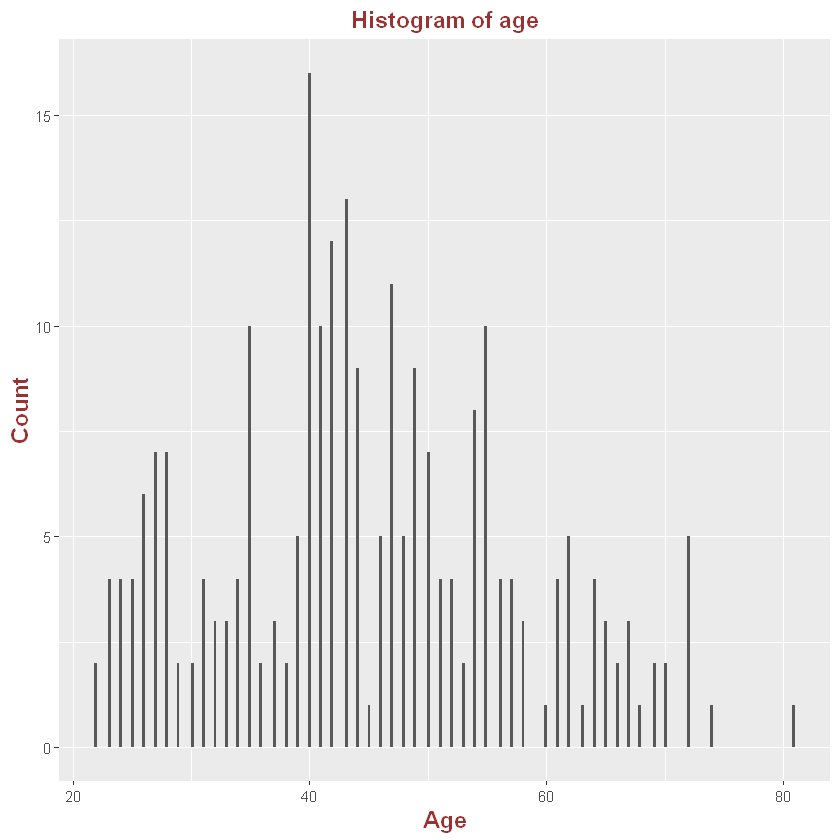

In [34]:
ggplot(data[-RMIndex,],aes(x = AGE)) + geom_histogram(stat = 'bin',bins = 246) + 
                    ggtitle("Histogram of age") + xlab("Age") + ylab("Count") + 
                                   theme( plot.title = element_text(color="#993333", size=14, face="bold",hjust = 0.5),
                                          axis.title.x = element_text(color="#993333", size=14, face="bold"),
                                         axis.title.y = element_text(color="#993333", size=14, face="bold"),
                                         )

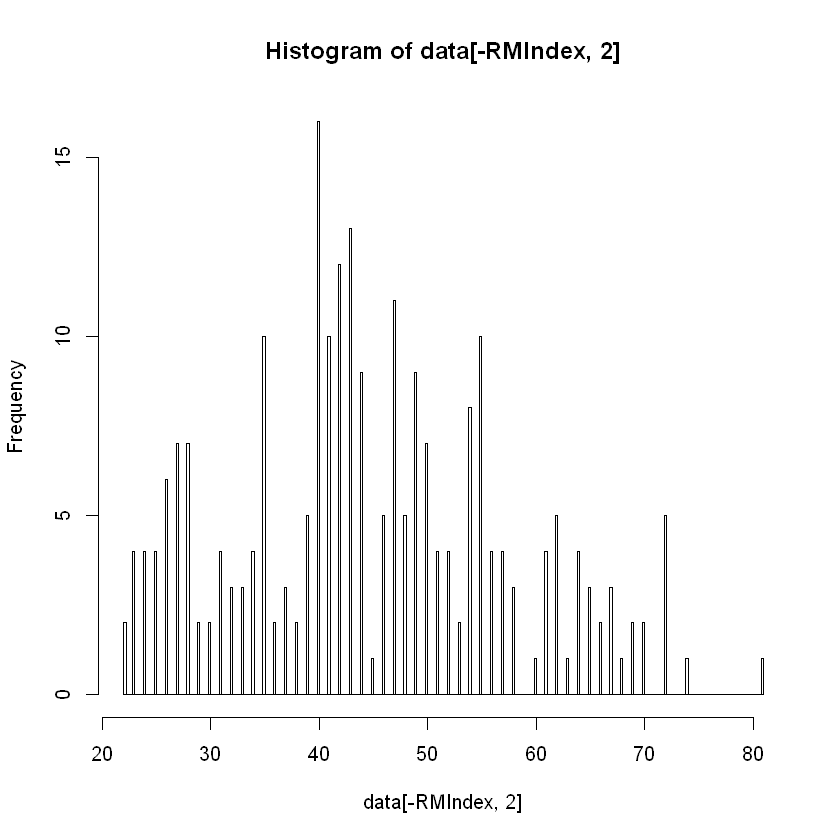

In [35]:
hist(data[-RMIndex, 2], breaks = 246)

In [36]:
14*13*12/1/2/3

[1] 364

In [37]:
results = matrix(rep(0, 364*4), ncol = 4, nrow = 364)
colnames(results) = c("V1", "V2", "V3", "R^2")
k = 1
for(i in 2:13){
    s = i+1
    for(j in s:14){
        t = j+1
        for(l in t:15){
            results[k, c(1,2,3)] = colnames(data)[c(i,j,l)]
            results[k, 4] = round(summary(lm(BODYFAT~., data = data[-RMIndex,c(1,i,j,l)]))$r.squared, 3)
            k = k+1
        }
    }
}
results[results[,4]==max(results[,4]),]

V1        V2        V3       R^2 
 "WEIGHT" "ABDOMEN"   "WRIST"    "0.72"

In [38]:
lm.final = lm(BODYFAT~WEIGHT+ABDOMEN+WRIST, data[-RMIndex,])
summary(lm.final)


Call:
lm(formula = BODYFAT ~ WEIGHT + ABDOMEN + WRIST, data = data[-RMIndex, 
    ])

Residuals:
   Min     1Q Median     3Q    Max 
-8.923 -2.910 -0.401  2.994  9.270 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -24.25349    6.27568  -3.865 0.000143 ***
WEIGHT       -0.08215    0.02228  -3.687 0.000280 ***
ABDOMEN       0.87755    0.05216  16.823  < 2e-16 ***
WRIST        -1.27640    0.39988  -3.192 0.001600 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.955 on 242 degrees of freedom
Multiple R-squared:   0.72,	Adjusted R-squared:  0.7165 
F-statistic: 207.4 on 3 and 242 DF,  p-value: < 2.2e-16


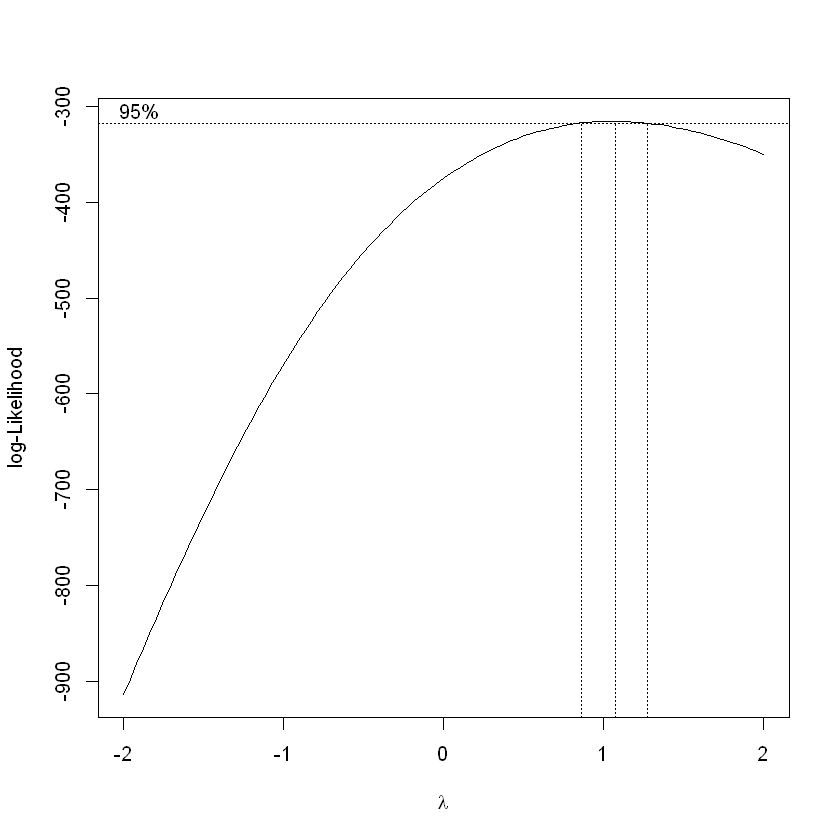

In [39]:
boxcox(lm.final)

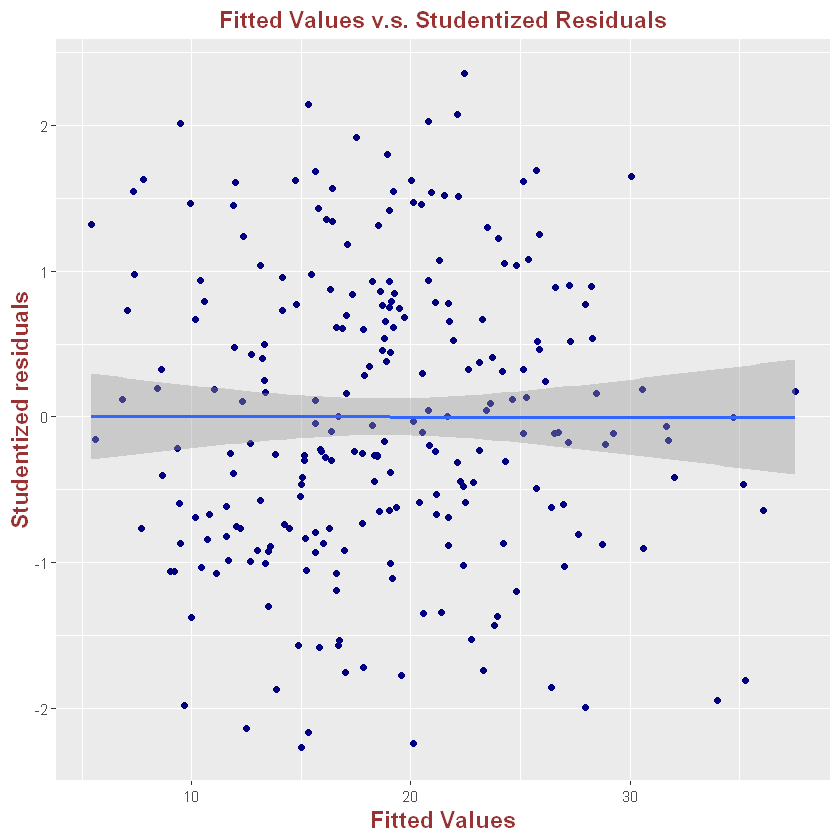

In [40]:
lm.stdres = stdres(lm.final)
df = data.frame(fit = lm.final$fitted.values, str = lm.stdres)
ggplot(df,aes(x = fit, y = str)) + geom_point(shape = 19, color = 'navyblue') + ggtitle("Fitted Values v.s. Studentized Residuals") +
                                   xlab("Fitted Values") + ylab("Studentized residuals") + 
                                   theme( plot.title = element_text(color="#993333", size=14, face="bold",hjust = 0.5),
                                          axis.title.x = element_text(color="#993333", size=14, face="bold"),
                                         axis.title.y = element_text(color="#993333", size=14, face="bold"),
                                         ) + geom_smooth(method = lm, se = TRUE)

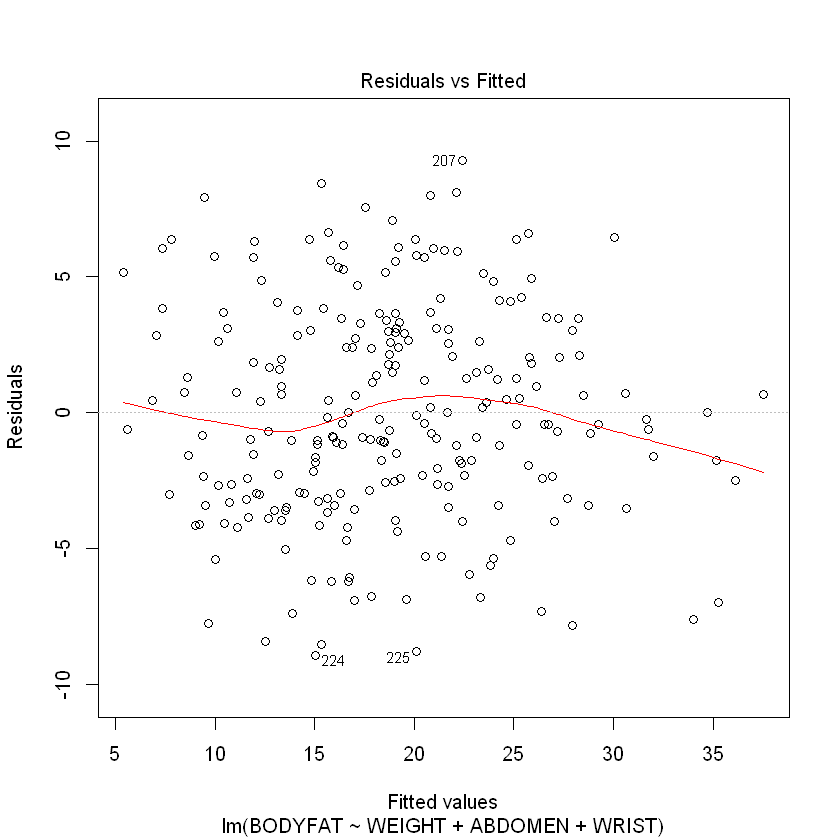

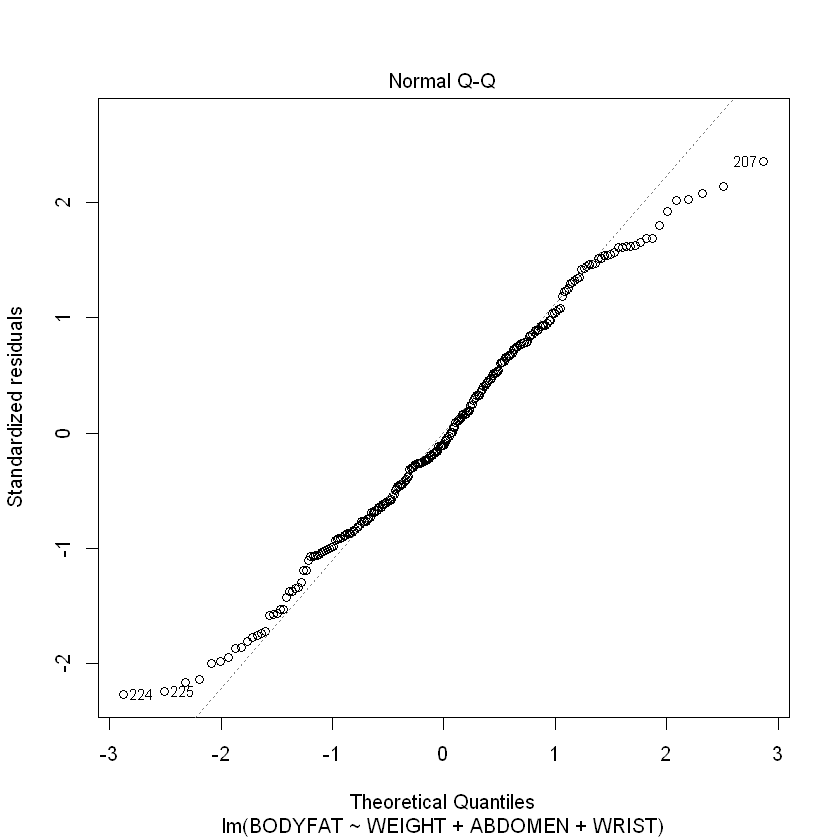

In [41]:
plot(lm.final, which = c(1,2))

## pairwise comparison

KernSmooth 2.23 loaded
Copyright M. P. Wand 1997-2009


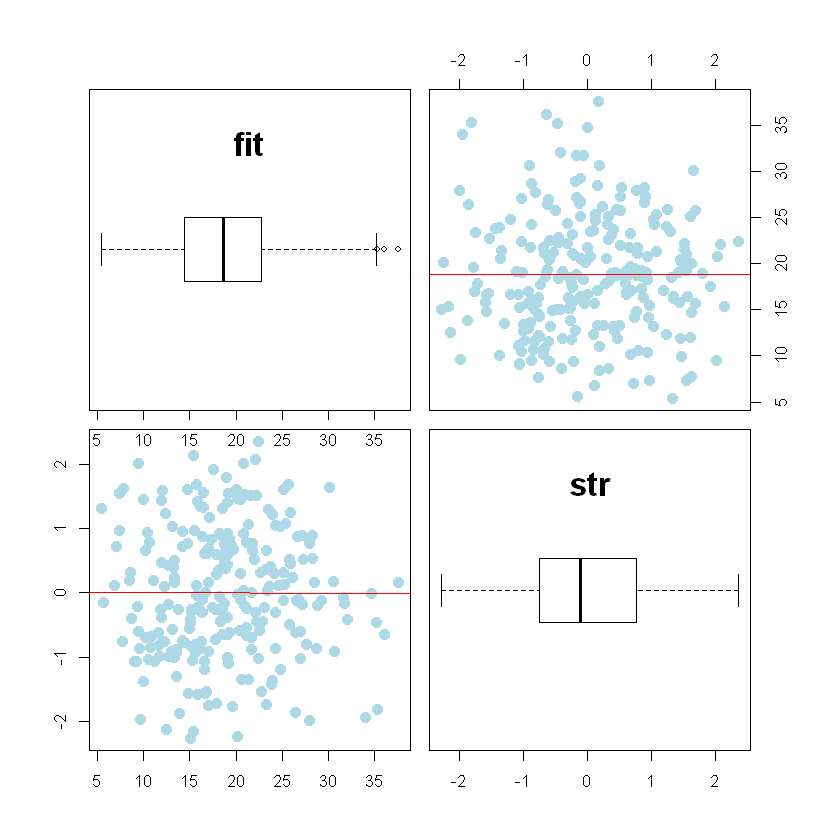

In [42]:
library("KernSmooth") 
### box and regression line
panel.box <- function(x, ...)
{
  usr <- par("usr"); on.exit(par(usr))
  par(usr = c(usr[3:4],0, 2 ))
  #par(usr = c(min(x)-1.5*IQR(x),max(x)+1.5*IQR(x), 0,2 ))
  boxplot(x,horizontal = TRUE, add=TRUE)
}

pairs(df,panel =function(x,y,...){
  points(x,y,...)
  abline(lm(y~x),col = 'red')
},
cex = 1.5,pch = 16, col = "light blue",
diag.panel = panel.box, cex.labels = 2,font.labels = 2)


ERROR: Error in eval(expr, envir, enclos): object 'AGE' not found


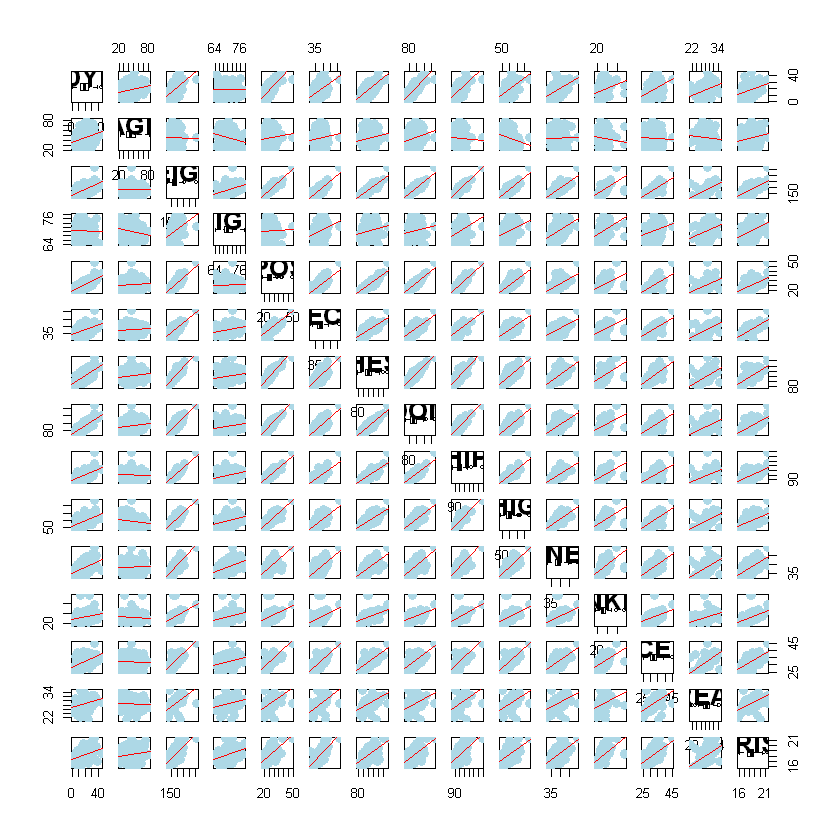

In [72]:
##------------------------ scatterplot matrix
require(SciViews)
library("KernSmooth") 
### box and regression line
panel.box <- function(x, ...)
{
  usr <- par("usr"); on.exit(par(usr))
  par(usr = c(usr[3:4],0, 2 ))
  #par(usr = c(min(x)-1.5*IQR(x),max(x)+1.5*IQR(x), 0,2 ))
  boxplot(x,horizontal = TRUE, add=TRUE)
}

pairs(data,panel =function(x,y,...){
  points(x,y,...)
  abline(lm(y~x),col = 'red')
},
cex = 1.5,pch = 16, col = "light blue",
diag.panel = panel.box, cex.labels = 2,font.labels = 2)



AGE + ADIPOSITY + NECK + CHEST + ABDOMEN + HIP + FOREARM + 
    WRIST